# Merging, Joining, and Concatenating

There are 3 main ways of combining DataFrames together: Merging, Joining and Concatenating. In this lecture we will discuss these 3 methods with examples.

____

### Example DataFrames

In [1]:
import pandas as pd

In [2]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [3]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [4]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

In [5]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [ ]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [ ]:
df1

In [ ]:
df2

In [ ]:
df3

## Concatenation

Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. You can use **pd.concat** and pass in a list of DataFrames to concatenate together:

In [8]:
pd.concat([df1,df2],axis = 0)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [9]:
pd.concat([df1,df2],axis = 1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7


_____
## Example DataFrames

In [10]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3','k4'],
                     'A': ['A0', 'A1', 'A2', 'A3','A4'],
                     'B': ['B0', 'B1', 'B2', 'B3','B4']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K5', 'K3','K6'],
                          'C': ['C0', 'C1', 'C5', 'C3','C6'],
                          'D': ['D0', 'D1', 'D5', 'D3','D6']})    

In [11]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
4,k4,A4,B4


In [12]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K5,C5,D5
3,K3,C3,D3
4,K6,C6,D6


___

## Merging

The **merge** function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

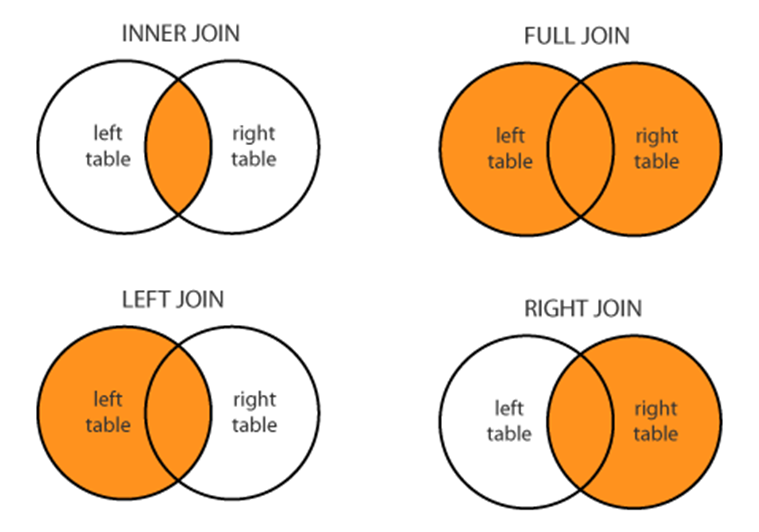

**pd.merge(left,right,how,on)**

In [13]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
4,k4,A4,B4


In [14]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K5,C5,D5
3,K3,C3,D3
4,K6,C6,D6


In [16]:
pd.merge(left=left,
        right=right,
        how='inner',
        on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K3,A3,B3,C3,D3


In [17]:
pd.merge(left=right,right=left,how='inner',on='key')

,key,C,D,A,B
0,K0,C0,D0,A0,B0
1,K1,C1,D1,A1,B1
2,K3,C3,D3,A3,B3


In [18]:
pd.merge(left=left,right=right,how='left',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,NaN,NaN
3,K3,A3,B3,C3,D3
4,k4,A4,B4,NaN,NaN


In [19]:
pd.merge(left=left,right=right,how='right',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K3,A3,B3,C3,D3
3,K5,NaN,NaN,C5,D5
4,K6,NaN,NaN,C6,D6


In [20]:
pd.merge(left,right,how='outer',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,NaN,NaN
3,K3,A3,B3,C3,D3
4,k4,A4,B4,NaN,NaN
5,K5,NaN,NaN,C5,D5
6,K6,NaN,NaN,C6,D6


Or to show a more complicated example:

In [21]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [22]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [23]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [24]:
pd.merge(left, right, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [25]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [26]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [27]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


## Joining
Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [29]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [30]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [ ]:
left.join(right, how='outer')